# 🚗 Used Car Price Prediction Project

## Project Overview

This project aims to predict the prices of used cars based on various features such as age, manufacturer, model, condition, mileage, fuel type, transmission, and more. The dataset was collected from Kaggle and includes categorical, numerical, and date-related features.  

### Key Steps:

**Data Exploration (EDA)**  
   - Understanding the structure, distributions, and missing values in the dataset.
   - Detecting outliers and inspecting feature distributions.

**Data Cleaning & Missing Value Handling**  
   - Dropping irrelevant columns (URLs, IDs, descriptions, etc.).
   - Handling missing values using appropriate strategies (median, mode, or a `"missing"` category).

**Feature Engineering & Encoding**  
   - Creating new features like `car_age` and `posting_day_type`.  
   - Encoding categorical variables using frequency encoding or one-hot encoding.  
   - Applying log transformation to skewed numerical features (`price`, `odometer`).

**Modeling**  
   - Using Random Forest Regressor to predict log-transformed car prices.  
   - Evaluating model performance using Train/Test split and cross-validation.  
   - Inspecting feature importances to understand key predictors.

**Results & Insights**  
   - The model achieves strong predictive performance with test R² around 0.84.  
   - The most important features include `car_age`, `odometer`, and vehicle-specific attributes.  

**Goal:**  
Provide a reliable predictive model for used car prices and insights into which features most strongly influence price.


## 1️⃣ Importing Libraries

In [150]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## 2️⃣ Load Dataset

In [151]:
# Load data
df = pd.read_csv("vehicles.csv")

# Quick overview
df.shape
df.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## 3️⃣ Inspect and Prepare Data

In [152]:
# Columns of data
df.columns 

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [153]:
# Returns total missing values in every column
df.isnull().sum() 

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [154]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [155]:
# Drop irrelevant columns
df = df.drop(["id","url","region_url","image_url","VIN","description","county","region","lat","long"], axis = 1)

# Updated columns
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state', 'posting_date'],
      dtype='object')

### Handling Missing Values

In [ ]:
!pip install rich
from rich import print

In [157]:
def count_missing(column):
    nan_sum = df[column].isnull().sum()
    nan_percent = round(nan_sum/len(df)*100, 1)
    print(f"NaN values for [bold]{column}[/bold] :{nan_sum} It's [bold]{nan_percent}%[/bold] of total data")

In [158]:
df["price"].value_counts().sort_index()

# There are lots of unreasonably low values. We can set a threshold and drop the values under the threshold. 
# But first lets drop 0 values

df = df[df['price'] > 0]

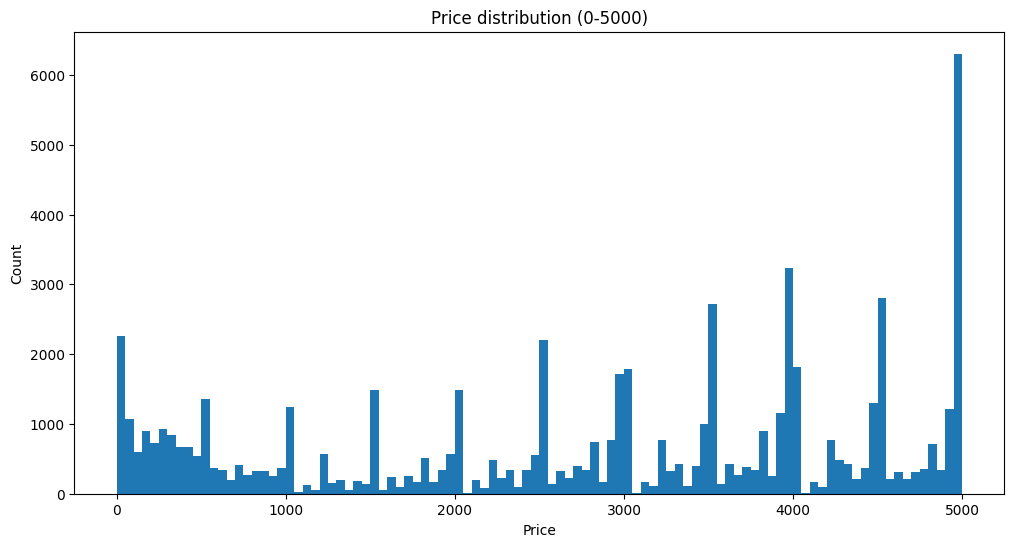

In [159]:

plt.figure(figsize=(12,6))
plt.hist(df['price'], bins=100, range=(0, 5000)) 
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price distribution (0-5000)')
plt.show()


In [160]:
# threshold: 500
df = df[(df['price'] > 500)]


In [161]:
count_missing("year")

NaN values for year :1172 It's 0.3% of total data

In [162]:
# We can drop NaN values for column "year"

df = df.dropna(subset=['year'])

In [163]:
column_names = ["manufacturer", "model", "title_status","drive","type","paint_color",
                "size","transmission","fuel","odometer","condition",
               "cylinders"]

for column in column_names:
    count_missing(column)

NaN values for manufacturer :14226 It's 3.7% of total data

NaN values for model :4474 It's 1.2% of total data

NaN values for title_status :6683 It's 1.7% of total data

NaN values for drive :116255 It's 30.4% of total data

NaN values for type :82304 It's 21.5% of total data

NaN values for paint_color :110857 It's 29.0% of total data

NaN values for size :274530 It's 71.8% of total data

NaN values for transmission :1757 It's 0.5% of total data

NaN values for fuel :2335 It's 0.6% of total data

NaN values for odometer :2059 It's 0.5% of total data

NaN values for condition :143877 It's 37.6% of total data

NaN values for cylinders :156363 It's 40.9% of total data

  ### Missing Value Handling Strategies
  
1. **Imputation Options**
   - Add a `"missing"` category or fill with most frequent/mean/median.. 
   - Delete rows with missing values
   - Or completely drop the column  

2. **Build Model & Check Feature Importance**
   - Train the model with both scenarios  
   - If the column with `"missing"` contributes significantly (high feature importance) → keep it  
   - If the column is unimportant or `"missing"` dominates and confuses the model → drop it  
 
 #### General Rule of Thumb for Categorical Features

- **If < 5% NaN**  
  → Fill with mode (most frequent) or `"missing"`  

- **If 5–20% NaN**  
  → `"missing"` is usually fine  

- **If > 20–30% NaN**  
  → Be careful: `"missing"` might dominate and confuse the model  
  - Option 1: Run a feature importance test → if the column is not important, drop it  
  - Option 2: Use `"missing"` but monitor model performance closely. Sometimes `"missing"` might be meaningful.
  




In [164]:
df.isnull().sum()

price                0
year                 0
manufacturer     14226
model             4474
condition       143877
cylinders       156363
fuel              2335
odometer          2059
title_status      6683
transmission      1757
drive           116255
size            274530
type             82304
paint_color     110857
state                0
posting_date         0
dtype: int64


|     Column     | NaN Values | Percentage | Missing Value Handling Method |
|----------------|------------|------------|-------------------------------|
| manufacturer   | 14181      |    3.7%    |   Fill with "missing"         |
| model          | 4467       |    1.2%    |   Fill with "missing"         |
| title_status   | 6564       |    1.7%    |   Fill with "missing"         |
| drive          | 116040     |    30.4%   |   Fill with "missing"         |
| type           | 82090      |    21.5%   |   Fill with "missing"         |
| paint_color    | 110243     |    28.9%   |   Fill with "missing"         |
| size           | 273768     |    71.7%   |   Fill with "missing"         |
| transmission   | 1757       |    0.5%    |   Fill with most common       |
| fuel           | 2335       |    0.6%    |   Fill with most common       |
| odometer       | 2047       |    0.5%    |   Fill with median            |
| condition      | 143356     |    37.6%   |   Fill with "missing"         |
| cylinders      | 156164     |    40.9%   |   Fill with "other"           |

In [166]:
column_names = ["manufacturer", "model", "title_status","drive","type","paint_color","size","condition"]

In [167]:
for column in column_names:
    df[column] = df[column].fillna("missing")

In [168]:
df.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders       156363
fuel              2335
odometer          2059
title_status         0
transmission      1757
drive                0
size                 0
type                 0
paint_color          0
state                0
posting_date         0
dtype: int64

In [169]:
# Find the most common value in "transmission" and "fuel column
most_common_t = df['transmission'].mode()[0]
most_common_f = df['fuel'].mode()[0]

# Fill NaN values with the most common value
df['transmission'] = df['transmission'].fillna(most_common_t)
df['fuel'] = df['fuel'].fillna(most_common_f)


In [170]:
#Find median for "odometer" column
df['odometer'] = df['odometer'].replace(1, np.nan)
median_value = df['odometer'].median()

# Fill NaN values with median value
df['odometer'] = df['odometer'].fillna(median_value)

In [171]:
df["cylinders"].value_counts()

6 cylinders     86352
4 cylinders     69810
8 cylinders     65439
5 cylinders      1648
10 cylinders     1158
other            1045
3 cylinders       580
12 cylinders      198
Name: cylinders, dtype: int64

In [172]:
# We can turn NaN values into "other"
df["cylinders"] = df["cylinders"].fillna("other") 

In [173]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
posting_date    0
dtype: int64

### Detecting and Handling Outliers

In [174]:
total = len(df)
filtered = df[(df['price'] > 500) & (df['price'] < 100_000)]
percentage = len(filtered) / total * 100

print(f"Rows kept: {len(filtered)} / {total} ({percentage}%)")



Rows kept: 381898 / 382593 (99.8183448207364%)

In [175]:
df = filtered

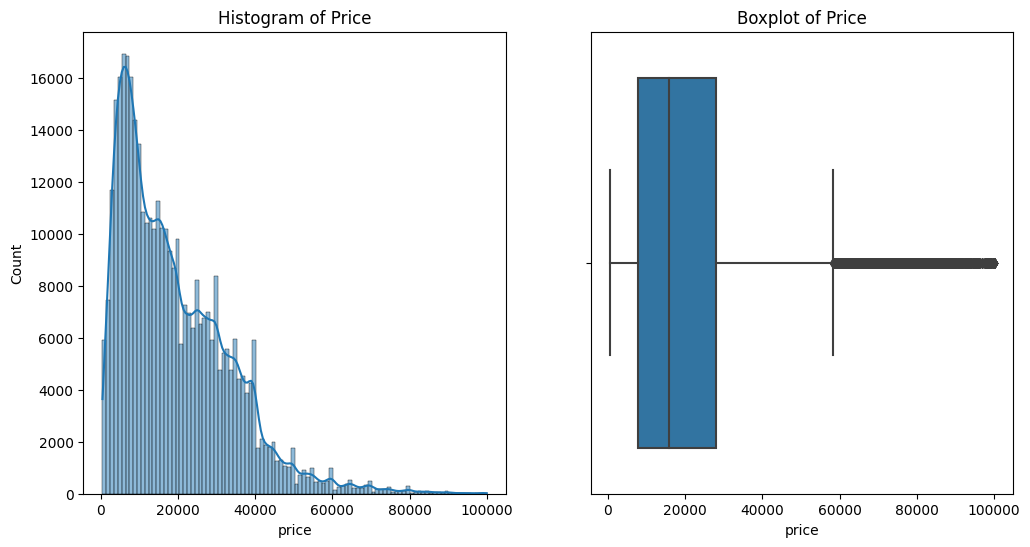

In [176]:
plt.figure(figsize=(12,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Histogram of Price")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price")

plt.show()

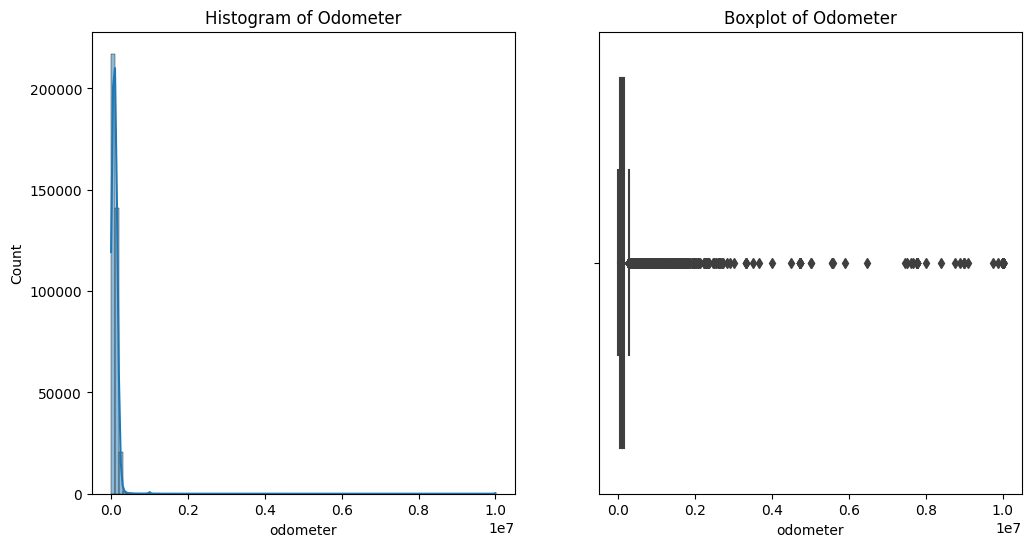

In [177]:
plt.figure(figsize=(12,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['odometer'], bins=100, kde=True)
plt.title("Histogram of Odometer")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['odometer'])
plt.title("Boxplot of Odometer")

plt.show()

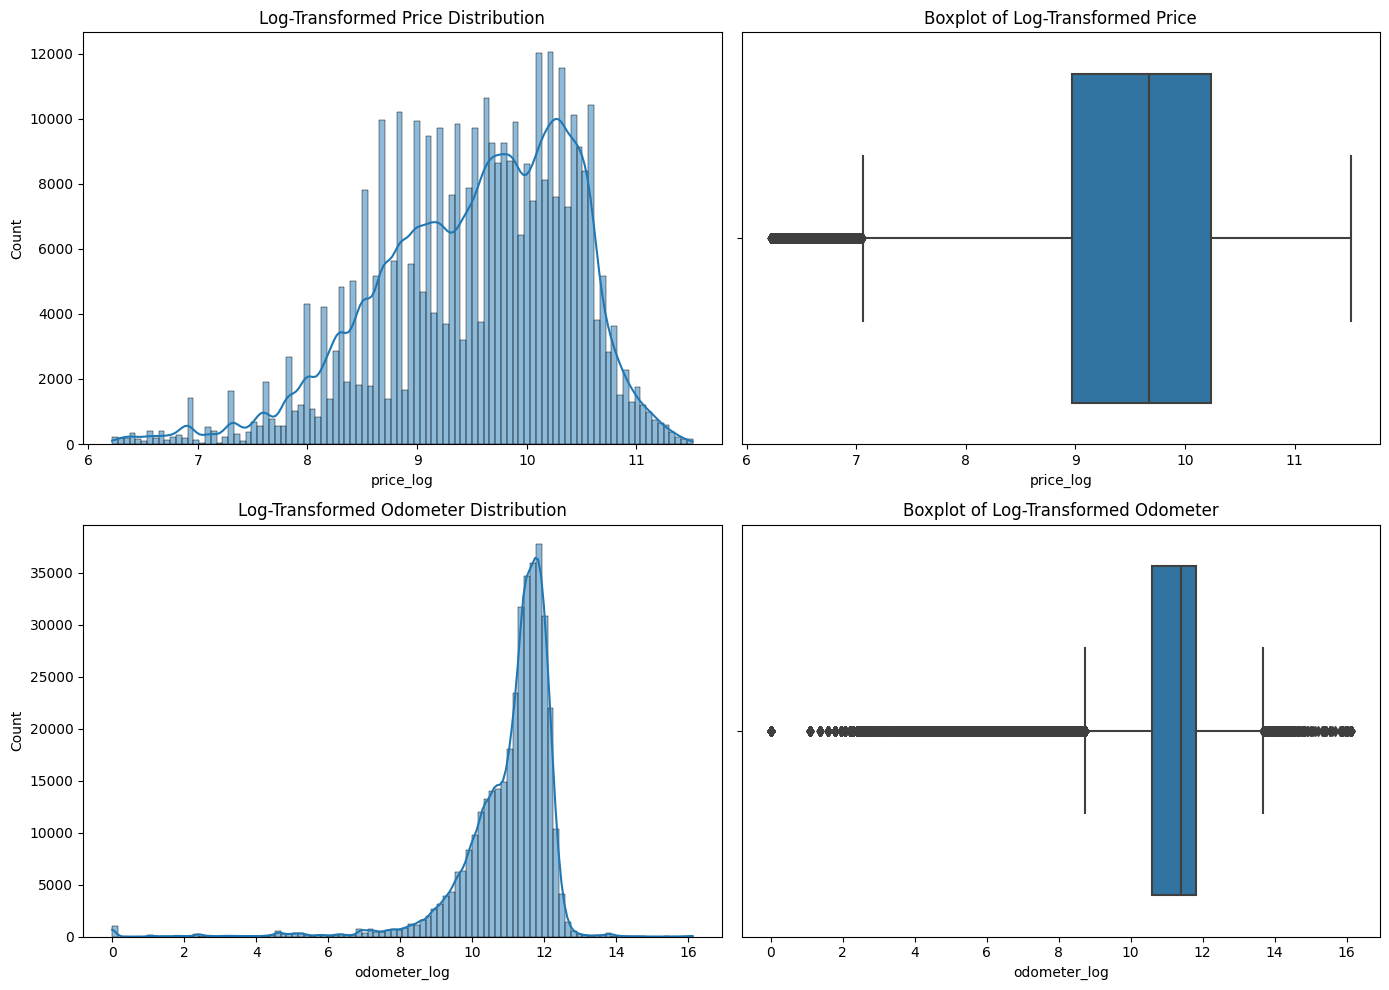

In [178]:
# Log transformation
df['price_log'] = np.log1p(df['price'])  # log1p = log(1+x), safe for 0 values
df['odometer_log'] = np.log1p(df['odometer'])
df = df.drop(["price","odometer"], axis = 1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# ---------- Price Log ----------
sns.histplot(df['price_log'], bins=100, kde=True, ax=axes[0,0])
axes[0,0].set_title("Log-Transformed Price Distribution")

sns.boxplot(x=df['price_log'], ax=axes[0,1])
axes[0,1].set_title("Boxplot of Log-Transformed Price")

# ---------- Odometer Log ----------
sns.histplot(df['odometer_log'], bins=100, kde=True, ax=axes[1,0])
axes[1,0].set_title("Log-Transformed Odometer Distribution")

sns.boxplot(x=df['odometer_log'], ax=axes[1,1])
axes[1,1].set_title("Boxplot of Log-Transformed Odometer")

plt.tight_layout()
plt.show()


## 4️⃣ Feature Engineering


In [179]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc = True)  

# Let's create a new column for car age
df['car_age'] = df['posting_date'].dt.year - df['year']


# Another column for day type
df['posting_day_type'] = df['posting_date'].dt.weekday.apply(lambda x: 0 if x >= 5 else 1)


In [180]:
# We can drop "posting_date" cloumn
df = df.drop(["posting_date"], axis = 1)

## 5️⃣ Feature Encoding

In [181]:
df.columns

Index(['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state', 'price_log', 'odometer_log', 'car_age', 'posting_day_type'],
      dtype='object')

In [182]:
# Check if one-hot encoding is applicable or not
def check_percentage(column):
    count = df[column].value_counts()/len(df)*100 
    percentage = count.iloc[:5].sum()
    print(f"Top 5 of {column} corresponds to {percentage}% of total data.")

In [183]:
df["paint_color"].value_counts()

missing    110541
white       71397
black       57486
silver      39332
blue        28931
red         28326
grey        22203
green        6917
custom       6192
brown        6098
yellow       1995
orange       1816
purple        664
Name: paint_color, dtype: int64

In [184]:
# we can change the colors other than the top 7 to "other"
top5_colors = df['paint_color'].value_counts().nlargest(7).index.tolist()
df['paint_color'] = df['paint_color'].apply(lambda x: x if x in top5_colors else 'other')

In [185]:
df["paint_color"].value_counts() 

missing    110541
white       71397
black       57486
silver      39332
blue        28931
red         28326
other       23682
grey        22203
Name: paint_color, dtype: int64

In [186]:
check_percentage("paint_color")
# We can apply one-hot encoding.
# "missing" can contribute to model.

Top 5 of paint_color corresponds to 80.56784795940277% of total data.

In [187]:
df["type"].value_counts()

missing        82109
sedan          77673
SUV            68277
pickup         40783
truck          29965
other          19562
coupe          17627
hatchback      15613
wagon           9775
van             7737
convertible     7233
mini-van        4496
offroad          585
bus              463
Name: type, dtype: int64

In [188]:
# Get Top 5 categories
top5_types = df['type'].value_counts().nlargest(5).index.tolist()

# Change everything except the top 5 to "other"
df['type'] = df['type'].apply(lambda x: x if x in top5_types else 'other')

In [189]:
check_percentage("type")
# We can apply one-hot encoding

Top 5 of type corresponds to 92.15366406736877% of total data.

In [190]:
df["cylinders"].value_counts()

other           157151
6 cylinders      86286
4 cylinders      69800
8 cylinders      65160
5 cylinders       1646
10 cylinders      1113
3 cylinders        578
12 cylinders       164
Name: cylinders, dtype: int64

In [191]:
# Get Top 5 categories
top5_cylinders = df['cylinders'].value_counts().nlargest(5).index

# Change everything except the top 5 to "other"
df['cylinders'] = df['cylinders'].apply(lambda x: x if x in top5_cylinders else 'other')

### One-Hot Encoding

In [192]:
def one_hot_encoding(df, column):
    dummies = pd.get_dummies(df[column], prefix = column, drop_first = True)
    df_new = pd.concat([df.drop(column, axis = 1), dummies], axis = 1)
    return df_new

In [193]:
columns = ["paint_color","type","cylinders","fuel","title_status","transmission","drive","size"]

In [194]:
for column in columns:
    df = one_hot_encoding(df, column)

In [195]:
df.columns

Index(['year', 'manufacturer', 'model', 'condition', 'state', 'price_log',
       'odometer_log', 'car_age', 'posting_day_type', 'paint_color_blue',
       'paint_color_grey', 'paint_color_missing', 'paint_color_other',
       'paint_color_red', 'paint_color_silver', 'paint_color_white',
       'type_missing', 'type_other', 'type_pickup', 'type_sedan', 'type_truck',
       'cylinders_5 cylinders', 'cylinders_6 cylinders',
       'cylinders_8 cylinders', 'cylinders_other', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'title_status_lien',
       'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage', 'transmission_manual',
       'transmission_other', 'drive_fwd', 'drive_missing', 'drive_rwd',
       'size_full-size', 'size_mid-size', 'size_missing', 'size_sub-compact'],
      dtype='object')

### Frequency Encoding

In [196]:
# Frequency encoding 

freq_encoding_s = df['state'].value_counts().to_dict()
freq_encoding_m = df['model'].value_counts().to_dict()
freq_encoding_mf = df['manufacturer'].value_counts().to_dict()

# New column
df['state_freq_encoded'] = df['state'].map(freq_encoding_s)
df['model_freq_encoded'] = df['model'].map(freq_encoding_m)
df['mf_freq_encoded'] = df['manufacturer'].map(freq_encoding_mf)

In [197]:
df = df.drop(["state", "model","manufacturer"], axis = 1)

### Ordinal Encoding

In [198]:
condition_mapping = {
    "new": 6,
    "like new": 5,
    "excellent": 4,
    "good": 3,
    "fair": 2,
    "salvage":1,
    "other": 0,       # unknown/rare categories
    "missing": 0
}

In [199]:
# Apply ordinal encoding
df['condition_encoded'] = df['condition'].map(condition_mapping)

In [200]:
df = df.drop(["condition"], axis = 1)

In [201]:
df.columns

Index(['year', 'price_log', 'odometer_log', 'car_age', 'posting_day_type',
       'paint_color_blue', 'paint_color_grey', 'paint_color_missing',
       'paint_color_other', 'paint_color_red', 'paint_color_silver',
       'paint_color_white', 'type_missing', 'type_other', 'type_pickup',
       'type_sedan', 'type_truck', 'cylinders_5 cylinders',
       'cylinders_6 cylinders', 'cylinders_8 cylinders', 'cylinders_other',
       'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',
       'title_status_lien', 'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage', 'transmission_manual',
       'transmission_other', 'drive_fwd', 'drive_missing', 'drive_rwd',
       'size_full-size', 'size_mid-size', 'size_missing', 'size_sub-compact',
       'state_freq_encoded', 'model_freq_encoded', 'mf_freq_encoded',
       'condition_encoded'],
      dtype='object')

## 6️⃣Train/Test Split

In [203]:
X = df.drop('price_log' , axis=1) ## independent data

In [204]:
y = df['price_log'] ## Dependent or Target data 

In [205]:
## getting training & testing data !
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
##In train_test_split, random_state sets the seed for the random number generator, ensuring that the split of data into training and test sets is reproducible. Using the same random_state value always gives the same split.

## 7️⃣Model Selection and Training

In [206]:
# Initialize the model with default value of parameters..
rf_model = RandomForestRegressor()

In [207]:
# Fit the model to the data...
rf_model.fit(X_train , y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [208]:
# Make predictions..

predictions = rf_model.predict(X_test)

In [209]:
predictions

array([10.70950648,  9.98165784, 10.14553287, ...,  8.38519096,
       10.71553995, 11.30989302])

## 8️⃣Model Evaluation

In [210]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.12182677137767312

MAE: 0.17465702996177823

R2: 0.845492066196377

### Feature Importance

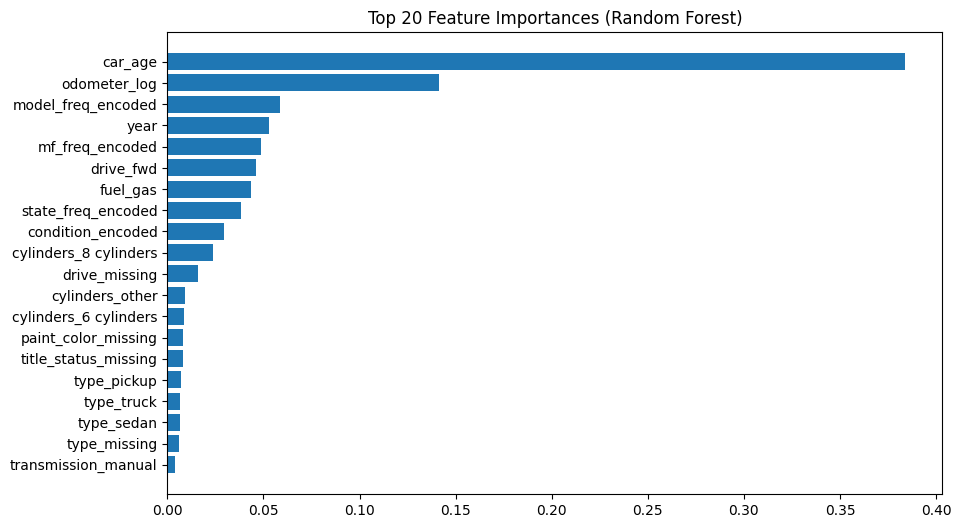

,Feature,Importance
2,car_age,0.384036
1,odometer_log,0.141451
39,model_freq_encoded,0.058449
0,year,0.053090
40,mf_freq_encoded,0.048820
31,drive_fwd,0.046026
21,fuel_gas,0.043575
38,state_freq_encoded,0.038118
41,condition_encoded,0.029713
18,cylinders_8 cylinders,0.023901


In [211]:
importances = rf_model.feature_importances_
features = X_train.columns


feat_importances = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Let's visualize the first 20 features
plt.figure(figsize=(10,6))
plt.barh(feat_importances["Feature"].head(20), feat_importances["Importance"].head(20))
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

# To see the full table
feat_importances.head(30)

### Residual Analysis
- We can see the model's errors by examining the distribution of prediction errors.

**Scatter plot**: If the points form a horizontal band and are symmetrically distributed around 0, the model is working well. However, if the distribution is slanted or fan-shaped, there is heteroskedasticity or model error.

**Histogram**: This allows you to see whether the residuals are close to a normal distribution.

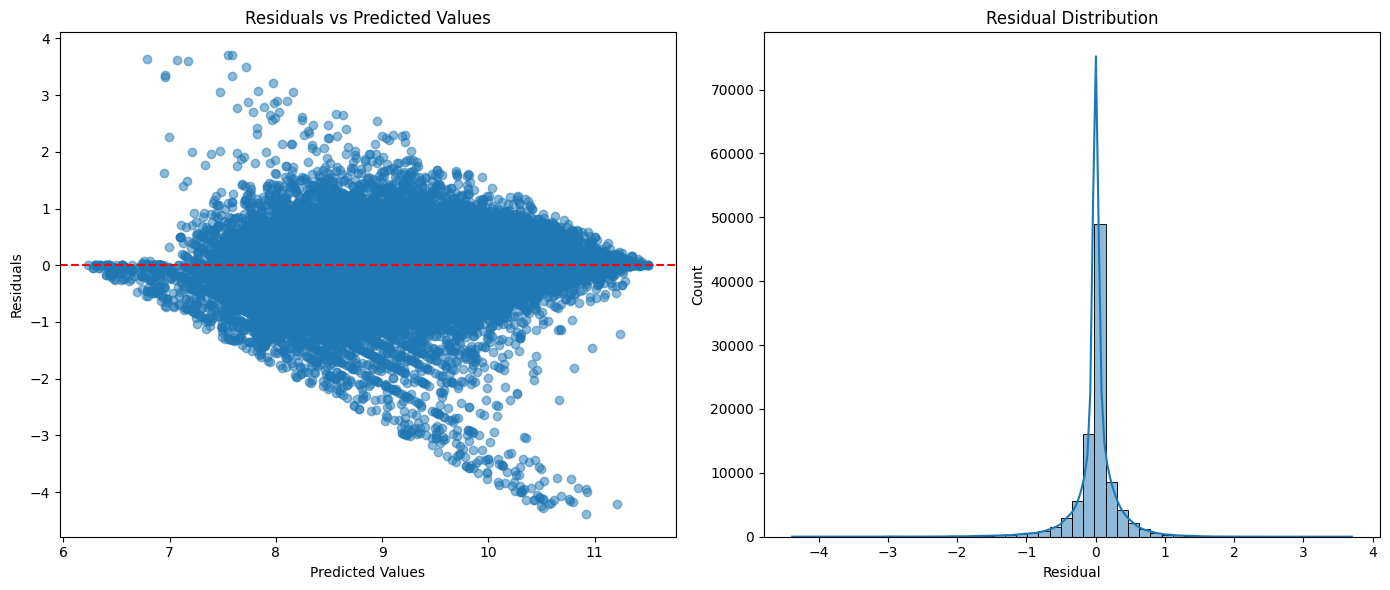

In [212]:
# Predictions
y_pred = rf_model.predict(X_test)

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(14,6))

# Scatter plot: Prediction vs Residual
plt.subplot(1,2,1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")

# Histogram: Residual distribution
plt.subplot(1,2,2)
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residual")
plt.title("Residual Distribution")

plt.tight_layout()
plt.show()

In [213]:

y_train_pred = rf_model.predict(X_train)
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_pred))


Train R2: 0.9775883702252951

Test R2: 0.845492066196377

In [214]:


cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print("CV R2 mean:", cv_scores.mean())
print("CV R2 std:", cv_scores.std())


CV R2 mean: 0.8332726357588927

CV R2 std: 0.0034533021426069533

## Model Evaluation Summary

- **Training R²:** 0.978  
- **Test R²:** 0.845  
- **Cross-Validation R²:** 0.833 ± 0.0035

### Interpretation:

- The model fits the training data very well (high training R²), indicating it has learned the patterns in the data effectively.  
- The test and cross-validation R² scores are slightly lower, which is expected; there is minor overfitting but it is not severe.  
- The low standard deviation in cross-validation R² demonstrates that the model's performance is stable across different folds.  

**Conclusion:**  
The model generalizes well to unseen data and is stable, making it suitable for deployment or reporting in the project. Further hyperparameter tuning could be done to slightly reduce overfitting, but the current performance is already strong.
